In [1]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score
import os
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


/var/folders/zg/ds4nwmvx3kq28hn4r4zwbbw80000gp/T/ipykernel_73946/3827359723.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ds_version = "V1_0"
annotations_file = "streetSurfaceVis_v1_0.csv"

pred_files = {
    "42": dict(
    pred_file_type = "V1_0_annotated_s42_type_prediction-V1_0_test-20240821_124849.csv",
    pred_file_asphalt = "V1_0_annotated_s42_quality_asphalt_prediction-V1_0_test_asphalt-20240821_124857.csv",
    pred_file_concrete = "V1_0_annotated_s42_quality_concrete_prediction-V1_0_test_concrete-20240821_124858.csv",
    pred_file_paving_stones = "V1_0_annotated_s42_quality_paving_stones_prediction-V1_0_test_paving_stones-20240821_124901.csv",
    pred_file_sett = "V1_0_annotated_s42_quality_sett_prediction-V1_0_test_sett-20240821_124902.csv",
    pred_file_unpaved = "V1_0_annotated_s42_quality_unpaved_prediction-V1_0_test_unpaved-20240821_124904.csv",
    ),
    "1024": dict(
    pred_file_type = "V1_0_annotated_s1024_type_prediction-V1_0_test-20240821_124917.csv",
    pred_file_asphalt = "V1_0_annotated_s1024_quality_asphalt_prediction-V1_0_test_asphalt-20240821_124924.csv",
    pred_file_concrete = "V1_0_annotated_s1024_quality_concrete_prediction-V1_0_test_concrete-20240821_124925.csv",
    pred_file_paving_stones = "V1_0_annotated_s1024_quality_paving_stones_prediction-V1_0_test_paving_stones-20240821_124928.csv",
    pred_file_sett = "V1_0_annotated_s1024_quality_sett_prediction-V1_0_test_sett-20240821_124929.csv",
    pred_file_unpaved = "V1_0_annotated_s1024_quality_unpaved_prediction-V1_0_test_unpaved-20240821_124931.csv",
    ),
    "3": dict(
    pred_file_type = "V1_0_annotated_s3_type_prediction-V1_0_test-20240821_124942.csv",
    pred_file_asphalt = "V1_0_annotated_s3_quality_asphalt_prediction-V1_0_test_asphalt-20240821_124951.csv",
    pred_file_concrete = "V1_0_annotated_s3_quality_concrete_prediction-V1_0_test_concrete-20240821_124952.csv",
    pred_file_paving_stones = "V1_0_annotated_s3_quality_paving_stones_prediction-V1_0_test_paving_stones-20240821_124955.csv",
    pred_file_sett = "V1_0_annotated_s3_quality_sett_prediction-V1_0_test_sett-20240821_124957.csv",
    pred_file_unpaved = "V1_0_annotated_s3_quality_unpaved_prediction-V1_0_test_unpaved-20240821_124959.csv",
    ),
    "57": dict(
    pred_file_type = "V1_0_annotated_s57_type_prediction-V1_0_test-20240821_125010.csv",
    pred_file_asphalt = "V1_0_annotated_s57_quality_asphalt_prediction-V1_0_test_asphalt-20240821_125018.csv",
    pred_file_concrete = "V1_0_annotated_s57_quality_concrete_prediction-V1_0_test_concrete-20240821_125019.csv",
    pred_file_paving_stones = "V1_0_annotated_s57_quality_paving_stones_prediction-V1_0_test_paving_stones-20240821_125021.csv",
    pred_file_sett = "V1_0_annotated_s57_quality_sett_prediction-V1_0_test_sett-20240821_125022.csv",
    pred_file_unpaved = "V1_0_annotated_s57_quality_unpaved_prediction-V1_0_test_unpaved-20240821_125024.csv",
    ),
    "1000": dict(
    pred_file_type = "V1_0_annotated_s1000_type_prediction-V1_0_test-20240821_125036.csv",
    pred_file_asphalt = "V1_0_annotated_s1000_quality_asphalt_prediction-V1_0_test_asphalt-20240821_125044.csv",
    pred_file_concrete = "V1_0_annotated_s1000_quality_concrete_prediction-V1_0_test_concrete-20240821_125044.csv",
    pred_file_paving_stones = "V1_0_annotated_s1000_quality_paving_stones_prediction-V1_0_test_paving_stones-20240821_125047.csv",
    pred_file_sett = "V1_0_annotated_s1000_quality_sett_prediction-V1_0_test_sett-20240821_125048.csv",
    pred_file_unpaved = "V1_0_annotated_s1000_quality_unpaved_prediction-V1_0_test_unpaved-20240821_125050.csv",
    ),
}
root_data_path = os.path.join("..", "data", ds_version) # TODO: prediction folder, see prediction file
data_path = os.path.join(root_data_path, "metadata") # TODO: prediction folder, see prediction file

In [3]:
preds = {}
for seed in [
    "42",
    "1024",
    "3",
    "57",
    "1000",
    ]:
    files = pred_files[seed]
    pred = pd.DataFrame()
    
    # print(f"reading {pred_file}")
    pred = pd.read_csv(os.path.join(data_path, files["pred_file_type"]))
    pred.rename(columns={"Image": "image_id",  "Level_0": "type_pred"}, inplace=True)

    type_pred = pred[["image_id", "Prediction", "type_pred", "is_in_validation"]]
    type_pred.rename(columns={"Prediction": "class_prob"}, inplace=True)
    idx = type_pred.groupby("image_id")["class_prob"].idxmax()
    type_pred = type_pred.loc[idx]

    asphalt_pred = pd.read_csv(os.path.join(data_path, files["pred_file_asphalt"]))
    concrete_pred = pd.read_csv(os.path.join(data_path, files["pred_file_concrete"]))
    paving_stones_pred = pd.read_csv(os.path.join(data_path, files["pred_file_paving_stones"]))
    sett_pred = pd.read_csv(os.path.join(data_path, files["pred_file_sett"]))
    unpaved_pred = pd.read_csv(os.path.join(data_path, files["pred_file_unpaved"]))

    quality_pred = pd.concat([
        asphalt_pred,
        concrete_pred,
        paving_stones_pred,
        sett_pred,
        unpaved_pred,
    ], ignore_index=True)
    quality_pred.rename(columns={"Image": "image_id",  "Level_0": "quality_pred"}, inplace=True)
    quality_pred = quality_pred[["image_id", "Prediction", "quality_pred", "is_in_validation"]]
    quality_pred.rename(columns={"Prediction": "quality_float_pred"}, inplace=True)

    pred = quality_pred.set_index("image_id").join(type_pred.set_index("image_id"), lsuffix="_quality", rsuffix="_type")
    files["pred"] = pred

/var/folders/zg/ds4nwmvx3kq28hn4r4zwbbw80000gp/T/ipykernel_73946/1423226543.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_pred.rename(columns={"Prediction": "class_prob"}, inplace=True)
/var/folders/zg/ds4nwmvx3kq28hn4r4zwbbw80000gp/T/ipykernel_73946/1423226543.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_pred.rename(columns={"Prediction": "class_prob"}, inplace=True)
/var/folders/zg/ds4nwmvx3kq28hn4r4zwbbw80000gp/T/ipykernel_73946/1423226543.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

In [4]:
pred_files[seed]["pred"]

,quality_float_pred,quality_pred,is_in_validation_quality,class_prob,type_pred,is_in_validation_type
image_id,,,,,,
1578441882345407,3.335800,intermediate,0,0.771629,asphalt,0
200165101940203,3.149146,intermediate,0,0.677352,asphalt,0
247104198095587,3.376451,intermediate,0,0.993613,asphalt,0
2642074279260762,2.873922,intermediate,0,0.936005,concrete,0
527242818474500,3.223023,intermediate,0,0.902705,asphalt,0
...,...,...,...,...,...,...
3292142807673085,4.249370,bad,0,0.997852,unpaved,0
3415316738778379,4.462070,bad,0,0.999268,unpaved,0
615685297377530,4.141402,bad,0,0.894556,unpaved,0


In [5]:
for seed in [
    "42",
    "1024",
    "3",
    "57",
    "1000",
    ]:
    files = pred_files[seed]

    annot = pd.read_csv(os.path.join(root_data_path, annotations_file))
    annot.rename(columns={"mapillary_image_id": "image_id", "surface_type": "type_true", "surface_quality": "quality_true"}, inplace=True)
    annot["quality_float_true"] = annot["quality_true"].map({"excellent": 1, "good": 2, "intermediate": 3, "bad": 4, "very_bad": 5})
    files["annot"] = annot

In [6]:
pred_files[seed]["annot"]

,image_id,user_id,user_name,captured_at,longitude,latitude,train,type_true,quality_true,quality_float_true
0,1000927687276860,103606985215406,dsmm,1655735677353,13.287805,51.502597,True,concrete,intermediate,3
1,1001349260556407,102468835332129,ber319,1659015876793,14.426536,52.217757,True,unpaved,bad,4
2,1001419624308587,100232345559807,carlheinz,1698249177500,13.457938,52.512914,True,asphalt,good,2
3,1001712924422413,100232345559807,carlheinz,1699107239000,13.386874,52.564970,True,concrete,excellent,1
4,1001853784055707,102627028648372,kartonage,1652268883000,13.389880,52.546260,True,asphalt,excellent,1
...,...,...,...,...,...,...,...,...,...,...
9117,435956961754271,103080845264750,teddy73,1657610360090,9.227063,49.181487,False,asphalt,good,2
9118,152523294419317,103080845264750,teddy73,1681130193000,9.179631,49.120123,False,asphalt,excellent,1
9119,303366287999275,100562292188203,changchun1,1612977717350,9.172729,49.106565,False,unpaved,bad,4
9120,563555448482947,100562292188203,changchun1,1654801255232,9.176029,49.098283,False,asphalt,excellent,1


In [7]:
for seed in [
    "42",
    "1024",
    "3",
    "57",
    "1000",
    ]:
    files = pred_files[seed]
    df = files["pred"].join(
        files["annot"][["image_id", "type_true", "quality_true", "quality_float_true"]].set_index("image_id"), how="left")
    files["df"] = df

In [8]:
pred_files[seed]["df"]

,quality_float_pred,quality_pred,is_in_validation_quality,class_prob,type_pred,is_in_validation_type,type_true,quality_true,quality_float_true
image_id,,,,,,,,,
1578441882345407,3.335800,intermediate,0,0.771629,asphalt,0,asphalt,bad,4
200165101940203,3.149146,intermediate,0,0.677352,asphalt,0,asphalt,bad,4
247104198095587,3.376451,intermediate,0,0.993613,asphalt,0,asphalt,bad,4
2642074279260762,2.873922,intermediate,0,0.936005,concrete,0,asphalt,bad,4
527242818474500,3.223023,intermediate,0,0.902705,asphalt,0,asphalt,bad,4
...,...,...,...,...,...,...,...,...,...
3292142807673085,4.249370,bad,0,0.997852,unpaved,0,unpaved,very_bad,5
3415316738778379,4.462070,bad,0,0.999268,unpaved,0,unpaved,very_bad,5
615685297377530,4.141402,bad,0,0.894556,unpaved,0,unpaved,very_bad,5


In [9]:
from scipy.stats import pearsonr, spearmanr
spearman_corr_df = pd.DataFrame(index=["asphalt", "concrete", "paving_stones", "sett", "unpaved"])
for seed in [
    "42",
    "1024",
    "3",
    "57",
    "1000",
    ]:
    print(f"seed: {seed}")
    
    files = pred_files[seed]
    df = files["df"]
    classes = df['type_true'].unique()
    quality_corr_list = []

    for cls in classes:
        class_df = df[df['type_true'] == cls]
        pearson_corr, pearson_p_value = pearsonr(class_df.quality_float_true, class_df.quality_float_pred)
        spearman_corr, spearman_p_value = spearmanr(class_df.quality_float_true, class_df.quality_float_pred)
        
        quality_corr_list.append({
            'Class': cls,
            'Pearson_Coefficient': pearson_corr,
            # 'Pearson_p_value': pearson_p_value,
            'Spearman_Coefficient': spearman_corr,
            # 'Spearman_p_value': spearman_p_value
        })

    # Berechne die Korrelationskoeffizienten und p-Werte für alle Daten zusammen
    pearson_corr, pearson_p_value = pearsonr(df.quality_float_true, df.quality_float_pred)
    spearman_corr, spearman_p_value = spearmanr(df.quality_float_true, df.quality_float_pred)

    # Füge die Gesamtwerte zur Tabelle hinzu
    quality_corr_list.append({
        'Class': 'Overall',
        'Pearson_Coefficient': pearson_corr,
        # 'Pearson_p_value': pearson_p_value,
        'Spearman_Coefficient': spearman_corr,
        # 'Spearman_p_value': spearman_p_value
    })

    quality_corr_results = pd.DataFrame(quality_corr_list)


    # Ausgabe der Ergebnisse
    print(quality_corr_results)


seed: 42
           Class  Pearson_Coefficient  Spearman_Coefficient
0        asphalt             0.608072              0.565026
1       concrete             0.554989              0.526115
2  paving_stones             0.408008              0.395609
3           sett             0.690910              0.674699
4        unpaved             0.663775              0.667135
5        Overall             0.817671              0.715854
seed: 1024
           Class  Pearson_Coefficient  Spearman_Coefficient
0        asphalt             0.605252              0.562102
1       concrete             0.531617              0.382629
2  paving_stones             0.441996              0.432400
3           sett             0.732676              0.725553
4        unpaved             0.691565              0.679701
5        Overall             0.818675              0.715346
seed: 3
           Class  Pearson_Coefficient  Spearman_Coefficient
0        asphalt             0.633942              0.591662
1       conc

In [10]:
report_df = {}

for seed in [
    "42",
    "1024",
    "3",
    "57",
    "1000",
    ]:
    files = pred_files[seed]
    df = files["df"]
    classes = df['type_true'].unique()
    quality_corr_list = []

    for cls in classes:
        class_df = df[df['type_true'] == cls]
        pearson_corr, pearson_p_value = pearsonr(class_df.quality_float_true, class_df.quality_float_pred)
        spearman_corr, spearman_p_value = spearmanr(class_df.quality_float_true, class_df.quality_float_pred)
        
        quality_corr_list.append({
            'Class': cls,
            'Pearson_Coefficient': pearson_corr,
            # 'Pearson_p_value': pearson_p_value,
            'Spearman_Coefficient': spearman_corr,
            # 'Spearman_p_value': spearman_p_value
        })

    # Berechne die Korrelationskoeffizienten und p-Werte für alle Daten zusammen
    pearson_corr, pearson_p_value = pearsonr(df.quality_float_true, df.quality_float_pred)
    spearman_corr, spearman_p_value = spearmanr(df.quality_float_true, df.quality_float_pred)

    # Füge die Gesamtwerte zur Tabelle hinzu
    quality_corr_list.append({
        'Class': 'Overall',
        'Pearson_Coefficient': pearson_corr,
        # 'Pearson_p_value': pearson_p_value,
        'Spearman_Coefficient': spearman_corr,
        # 'Spearman_p_value': spearman_p_value
    })

    quality_corr_results = pd.DataFrame(quality_corr_list).set_index("Class")
    report_df[seed] = quality_corr_results
    
# print(report_df)
report_df = pd.concat(report_df, axis=1)
mean_df = report_df.T.groupby(level=1).mean().T
mean_df.columns = pd.MultiIndex.from_product([["mean"], mean_df.columns])
std_df = report_df.T.groupby(level=1).std().T
std_df.columns = pd.MultiIndex.from_product([["std"], std_df.columns])

final_df = pd.concat([mean_df, std_df], axis=1).round(2)
print(final_df)
print(final_df.to_latex(float_format="{:.2f}".format,))

                             mean                                      std  \
              Pearson_Coefficient Spearman_Coefficient Pearson_Coefficient   
Class                                                                        
asphalt                      0.62                 0.58                0.01   
concrete                     0.59                 0.49                0.08   
paving_stones                0.43                 0.42                0.03   
sett                         0.69                 0.65                0.03   
unpaved                      0.65                 0.64                0.04   
Overall                      0.82                 0.72                0.00   

                                    
              Spearman_Coefficient  
Class                               
asphalt                       0.02  
concrete                      0.11  
paving_stones                 0.03  
sett                          0.06  
unpaved                       0.04  
O

In [11]:
from sklearn.metrics import classification_report

for seed in [
    "42",
    "1024",
    "3",
    "57",
    "1000",
    ]:
    print(f"seed: {seed}")

    files = pred_files[seed]
    df = files["df"]
    report = classification_report(df['type_true'], df['type_pred'])
    print(report)

seed: 42
               precision    recall  f1-score   support

      asphalt       0.98      0.89      0.93       530
     concrete       0.22      0.75      0.34        16
paving_stones       0.90      0.94      0.92       113
         sett       0.91      0.94      0.92        32
      unpaved       0.93      0.98      0.95        85

     accuracy                           0.91       776
    macro avg       0.79      0.90      0.81       776
 weighted avg       0.95      0.91      0.92       776

seed: 1024
               precision    recall  f1-score   support

      asphalt       0.99      0.89      0.94       530
     concrete       0.22      0.75      0.34        16
paving_stones       0.89      0.89      0.89       113
         sett       0.84      0.97      0.90        32
      unpaved       0.90      0.98      0.94        85

     accuracy                           0.90       776
    macro avg       0.77      0.90      0.80       776
 weighted avg       0.94      0.90      

In [12]:
report_df = {}

for seed in [
    "42",
    "1024",
    "3",
    "57",
    "1000",
    ]:
    files = pred_files[seed]
    df = files["df"]
    report = classification_report(df['type_true'], df['type_pred'])
    report = pd.DataFrame(classification_report(df['type_true'], df['type_pred'], output_dict=True)).transpose()
    report_df[seed] = report

# print(report_df)
    
report_df = pd.concat(report_df, axis=1)
mean_df = report_df.T.groupby(level=1).mean().T[["precision", "recall", "f1-score", "support"]]
mean_df.columns = pd.MultiIndex.from_product([["mean"], mean_df.columns])
std_df = report_df.T.groupby(level=1).std().T[["precision", "recall", "f1-score", "support"]]
std_df.columns = pd.MultiIndex.from_product([["std"], std_df.columns])

final_df = pd.concat([mean_df, std_df], axis=1).round(2)
print(final_df)
print(final_df.to_latex(float_format="{:.2f}".format,))

                   mean                               std                  \
              precision recall f1-score support precision recall f1-score   
asphalt            0.98   0.90     0.94  530.00      0.00   0.01     0.01   
concrete           0.23   0.74     0.35   16.00      0.01   0.07     0.01   
paving_stones      0.89   0.92     0.90  113.00      0.03   0.03     0.02   
sett               0.88   0.92     0.90   32.00      0.03   0.04     0.03   
unpaved            0.93   0.97     0.95   85.00      0.02   0.02     0.01   
accuracy           0.91   0.91     0.91    0.91      0.01   0.01     0.01   
macro avg          0.78   0.89     0.81  776.00      0.01   0.02     0.01   
weighted avg       0.94   0.91     0.92  776.00      0.01   0.01     0.00   

                       
              support  
asphalt          0.00  
concrete         0.00  
paving_stones    0.00  
sett             0.00  
unpaved          0.00  
accuracy         0.01  
macro avg        0.00  
weighted avg 

In [13]:
def compute_measures_cat(true, pred):
    return{
        "accuracy": sum(true == pred) / len(true)
    }

def compute_measures_float(true_float, pred_float):
    m = {
    # "accuracy": sum(true_float.round() == pred_float.round()) / len(true_float),
    "accuracy_": sum(abs((true_float - pred_float)) < 0.5) / len(true_float),
    "accuracy_1off": sum(abs((true_float - pred_float)) < 1.5) / len(true_float),
    "correlation": np.corrcoef(true_float, pred_float)[0, 1],
    "r_square": r2_score(true_float, pred_float),
    "mse": mean_squared_error(true_float, pred_float),
    "mae": mean_absolute_error(true_float, pred_float)
    }
    m["rmse"] = np.sqrt(m["mse"])
    return m

In [14]:
for seed in [
    "42",
    "1024",
    "3",
    "57",
    "1000",
    ]:
    print(f"\nseed: {seed}")

    files = pred_files[seed]
    df = files["df"]
    gm_surface = pd.DataFrame()
    for surface in df.type_true.unique():
        df_ = df[df.type_true == surface]
        gm = compute_measures_float(df_.quality_float_true, df_.quality_float_pred)
        gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)
        
    gm = compute_measures_float(df.quality_float_true, df.quality_float_pred)
    gm_surface = pd.concat([gm_surface, pd.Series(gm, name="overall")], axis=1)

    print(gm_surface.round(2))


seed: 42
               asphalt  concrete  paving_stones  sett  unpaved  overall
accuracy_         0.63      0.69           0.59  0.62     0.55     0.61
accuracy_1off     0.99      1.00           0.99  1.00     1.00     0.99
correlation       0.61      0.55           0.41  0.69     0.66     0.82
r_square          0.32      0.26          -0.04  0.14     0.27     0.67
mse               0.31      0.26           0.35  0.26     0.32     0.31
mae               0.45      0.39           0.47  0.42     0.46     0.45
rmse              0.56      0.51           0.59  0.51     0.56     0.56

seed: 1024
               asphalt  concrete  paving_stones  sett  unpaved  overall
accuracy_         0.60      0.62           0.57  0.78     0.67     0.61
accuracy_1off     0.99      1.00           1.00  1.00     1.00     0.99
correlation       0.61      0.53           0.44  0.73     0.69     0.82
r_square          0.28      0.12           0.10  0.40     0.31     0.67
mse               0.33      0.32          

In [15]:
report_df = {}

for seed in [
    "42",
    "1024",
    "3",
    "57",
    "1000",
    ]:
    files = pred_files[seed]
    df = files["df"]


    gm_surface = pd.DataFrame()
    for surface in df.type_true.unique():
        df_ = df[df.type_true == surface]
        gm = compute_measures_float(df_.quality_float_true, df_.quality_float_pred)
        gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)
        
    gm = compute_measures_float(df.quality_float_true, df.quality_float_pred)
    gm_surface = pd.concat([gm_surface, pd.Series(gm, name="overall")], axis=1)

    gm_surface = gm_surface.transpose()
    report_df[seed] = gm_surface
    
report_df = pd.concat(report_df, axis=1)
# print(report_df)
mean_df = report_df.T.groupby(level=1).mean().T
mean_df.columns = pd.MultiIndex.from_product([["mean"], mean_df.columns])
std_df = report_df.T.groupby(level=1).std().T
std_df.columns = pd.MultiIndex.from_product([["std"], std_df.columns])

final_df = pd.concat([mean_df, std_df], axis=1).round(2)
print(final_df)
print(final_df.to_latex(float_format="{:.2f}".format,))

                   mean                                                       \
              accuracy_ accuracy_1off correlation   mae   mse r_square  rmse   
asphalt            0.63          0.99        0.62  0.45  0.31     0.32  0.56   
concrete           0.65          1.00        0.59  0.42  0.26     0.27  0.51   
paving_stones      0.61          1.00        0.43  0.46  0.32     0.04  0.57   
sett               0.71          1.00        0.69  0.39  0.24     0.22  0.49   
unpaved            0.61          0.99        0.65  0.45  0.32     0.25  0.57   
overall            0.63          0.99        0.82  0.45  0.31     0.67  0.56   

                    std                                                       
              accuracy_ accuracy_1off correlation   mae   mse r_square  rmse  
asphalt            0.02          0.00        0.01  0.01  0.01     0.02  0.01  
concrete           0.03          0.00        0.08  0.06  0.05     0.14  0.05  
paving_stones      0.03          0.00      

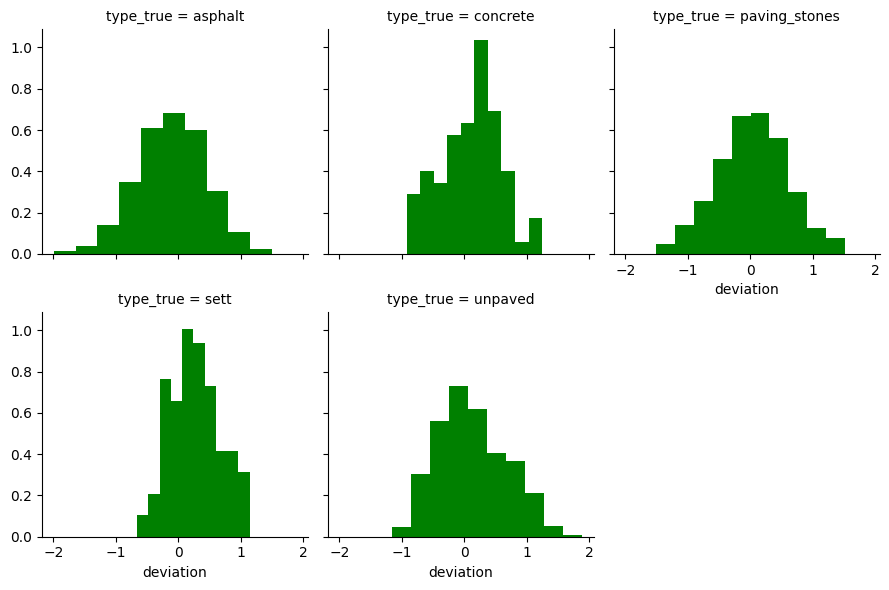

In [16]:
report_df = {}

for seed in [
    "42",
    "1024",
    "3",
    "57",
    "1000",
    ]:
    files = pred_files[seed]
    report_df[seed] = files["df"]

    
report_df = pd.concat(report_df, axis=0)
report_df["deviation"] = report_df["quality_float_true"] - report_df["quality_float_pred"]
# Create a FacetGrid for histograms
g_hist = sns.FacetGrid(report_df, col="type_true", col_wrap=3)

# Map histogram for deviation for each surface type
g_hist.map(plt.hist, "deviation", color='green', density=True, bins=10)

plt.show()

In [17]:
df

,quality_float_pred,quality_pred,is_in_validation_quality,class_prob,type_pred,is_in_validation_type,type_true,quality_true,quality_float_true
image_id,,,,,,,,,
1578441882345407,3.335800,intermediate,0,0.771629,asphalt,0,asphalt,bad,4
200165101940203,3.149146,intermediate,0,0.677352,asphalt,0,asphalt,bad,4
247104198095587,3.376451,intermediate,0,0.993613,asphalt,0,asphalt,bad,4
2642074279260762,2.873922,intermediate,0,0.936005,concrete,0,asphalt,bad,4
527242818474500,3.223023,intermediate,0,0.902705,asphalt,0,asphalt,bad,4
...,...,...,...,...,...,...,...,...,...
3292142807673085,4.249370,bad,0,0.997852,unpaved,0,unpaved,very_bad,5
3415316738778379,4.462070,bad,0,0.999268,unpaved,0,unpaved,very_bad,5
615685297377530,4.141402,bad,0,0.894556,unpaved,0,unpaved,very_bad,5


In [18]:
df.groupby(["type_true", "quality_true"]).size()

type_true      quality_true
asphalt        bad               8
               excellent       180
               good            289
               intermediate     53
concrete       excellent         4
               good             10
               intermediate      2
paving_stones  excellent        25
               good             74
               intermediate     14
sett           bad              14
               good              1
               intermediate     17
unpaved        bad              48
               intermediate     21
               very_bad         16
dtype: int64

In [19]:
# df.shape

## Surface type

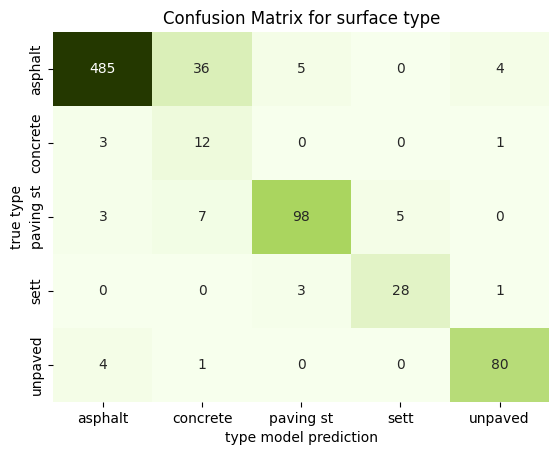

In [21]:
# only validation
# Plotting the confusion matrix using seaborn heatmap
cmap = LinearSegmentedColormap.from_list("mycmap", ["#F7FFED", "#76B900", "#355300", "#243800"])

cm = confusion_matrix(df.type_true, df.type_pred, labels=["asphalt", "concrete", "paving_stones", "sett", "unpaved"])
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
            xticklabels=["asphalt", "concrete", "paving st", "sett", "unpaved"],
            yticklabels=["asphalt", "concrete", "paving st", "sett", "unpaved"])
plt.title(f"Confusion Matrix for surface type")
plt.xlabel("type model prediction")
plt.ylabel("true type")
plt.savefig("confusion_matrix_type_v1_0.png", transparent=True, bbox_inches='tight')
plt.show()

Text(58.08159722222221, 0.5, 'true type')

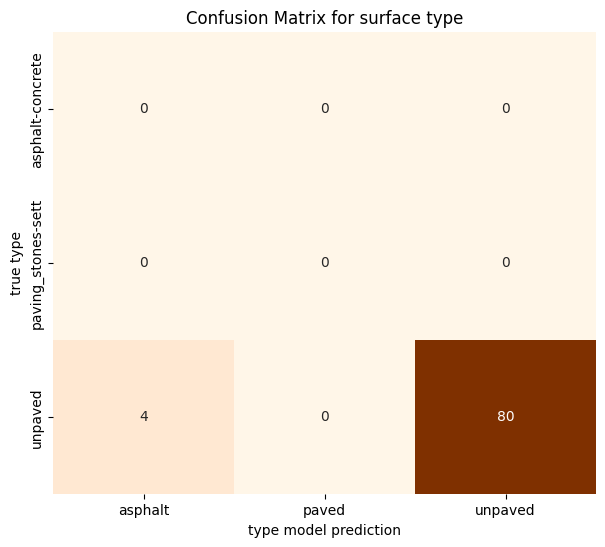

In [20]:
# # confusion matrix for all model surface types
# cmap = LinearSegmentedColormap.from_list("mycmap", ["#FFF6E8", "#FF5F00", "#7F3000"])

# # labels_type_true = df.type_true.unique()
# # labels_type_pred = df.type_pred.unique()
# labels = ['asphalt', 'concrete', 'paving_stones', 'sett', 'paved', 'unpaved']

# cm = confusion_matrix(df.type_true, df.type_pred, labels=labels)
# cm_df = pd.DataFrame(cm, index=labels, columns=labels)
# cm_df = cm_df[['asphalt', 'paved', 'unpaved']]
# cm_df = cm_df.loc[['asphalt', 'concrete', 'paving_stones', 'sett', 'unpaved']]
# # plt.figure()
# # sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap, cbar=False,
# #             xticklabels=['asphalt', 'concrete', 'paving_stones', 'sett', 'unpaved'],
# #             yticklabels=['asphalt', 'paved', 'unpaved'])
# # plt.title(f"Confusion Matrix for surface type")
# # plt.xlabel("type model prediction")
# # plt.ylabel("true type")
# fig, axes = plt.subplots(1, 1, figsize=(7, 6))

# # Confusion Matrix für Surface Type
# sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap, cbar=False,
#             xticklabels=['asphalt', 'paved', 'unpaved'],
#             yticklabels=['asphalt', 'concrete', 'paving_stones', 'sett', 'unpaved'],
#             ax=axes)
# axes.set_title(f"Confusion Matrix for surface type")
# axes.set_xlabel("type model prediction")
# axes.set_ylabel("true type")

# confusion matrix for all model surface types
cmap = LinearSegmentedColormap.from_list("mycmap", ["#FFF6E8", "#FF5F00", "#7F3000"])

# labels_type_true = df.type_true.unique()
# labels_type_pred = df.type_pred.unique()
labels = ['asphalt', 'asphalt-concrete', 'paving_stones-sett', 'paved', 'unpaved']

cm = confusion_matrix(df.type_true, df.type_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df = cm_df[['asphalt', 'paved', 'unpaved']]
cm_df = cm_df.loc[['asphalt-concrete', 'paving_stones-sett', 'unpaved']]
# plt.figure()
# sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap, cbar=False,
#             xticklabels=['asphalt', 'concrete', 'paving_stones', 'sett', 'unpaved'],
#             yticklabels=['asphalt', 'paved', 'unpaved'])
# plt.title(f"Confusion Matrix for surface type")
# plt.xlabel("type model prediction")
# plt.ylabel("true type")
fig, axes = plt.subplots(1, 1, figsize=(7, 6))

# Confusion Matrix für Surface Type
sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap, cbar=False,
            xticklabels=['asphalt', 'paved', 'unpaved'],
            yticklabels=['asphalt-concrete', 'paving_stones-sett', 'unpaved'],
            ax=axes)
axes.set_title(f"Confusion Matrix for surface type")
axes.set_xlabel("type model prediction")
axes.set_ylabel("true type")

In [17]:
# # confusion matrix for combined surface types
# fig, axes = plt.subplots(1, 1, figsize=(7, 6))

# cm_df.loc['asphalt_concrete_comb'] = cm_df.loc['asphalt'] + cm_df.loc['concrete']
# cm_df.loc['paving_st_sett_comb'] = cm_df.loc['paving_stones'] + cm_df.loc['sett']
# cm_df = cm_df.loc[['asphalt_concrete_comb', 'paving_st_sett_comb', 'unpaved']]
# # plt.figure()
# sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap, cbar=False,
#             xticklabels=['asphalt', 'paved', 'unpaved'],
#             yticklabels=['asphalt_concrete_comb', 'paving_st_sett_comb', 'unpaved'],
#             ax=axes)
# axes.set_title(f"Confusion Matrix for surface type")
# axes.set_xlabel("type model prediction")
# axes.set_ylabel("true type")

In [18]:
overall_accuracy = cm_df.values.trace() / cm_df.values.sum()

class_precision = cm_df.rename(index={'asphalt-concrete': 'asphalt', 'paving_stones-sett': 'paved'}).apply(lambda x: x[x.name] / x.sum(), axis=1)

print("Recall per class:")
print(class_precision)

print(f"\nAccuracy: {overall_accuracy:.2f}")


Recall per class:
asphalt    0.975000
paved      0.521352
unpaved    0.018260
dtype: float64

Accuracy: 0.69


## Surface Quality

Text(58.081597222222214, 0.5, 'true quality')

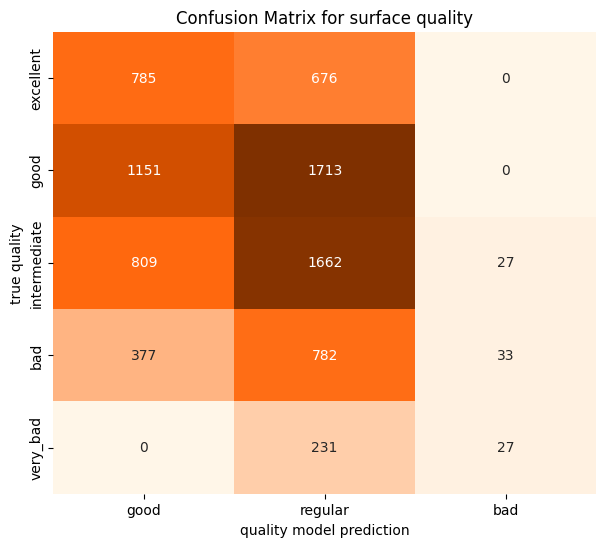

In [19]:
# confusion matrix for all model surface types
cmap = LinearSegmentedColormap.from_list("mycmap", ["#FFF6E8", "#FF5F00", "#7F3000"])

# labels_type_true = df.type_true.unique()
# labels_type_pred = df.type_pred.unique()
labels = ['excellent', 'good', 'intermediate', 'regular', 'bad', 'very_bad']

fig, axes = plt.subplots(1, 1, figsize=(7, 6))

cm = confusion_matrix(df.quality_true, df.quality_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df = cm_df.loc[['excellent', 'good', 'intermediate', 'bad', 'very_bad']]
cm_df = cm_df[['good', 'regular', 'bad']]
sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap, cbar=False,
            xticklabels=['good', 'regular', 'bad'],
            yticklabels=['excellent', 'good', 'intermediate', 'bad', 'very_bad'],
            ax=axes)
axes.set_title(f"Confusion Matrix for surface quality")
axes.set_xlabel("quality model prediction")
axes.set_ylabel("true quality")

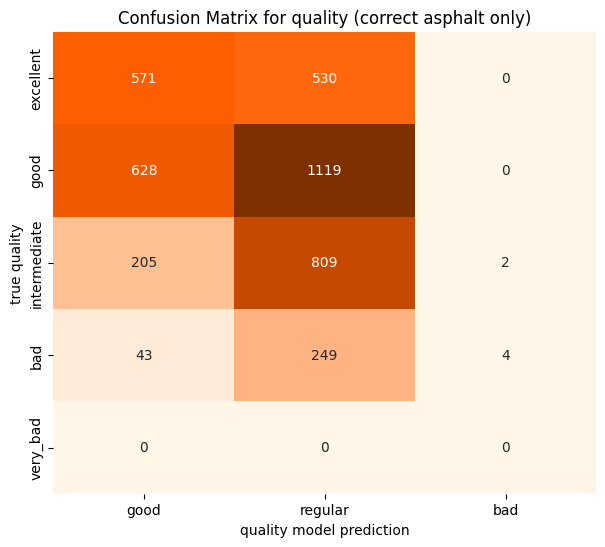

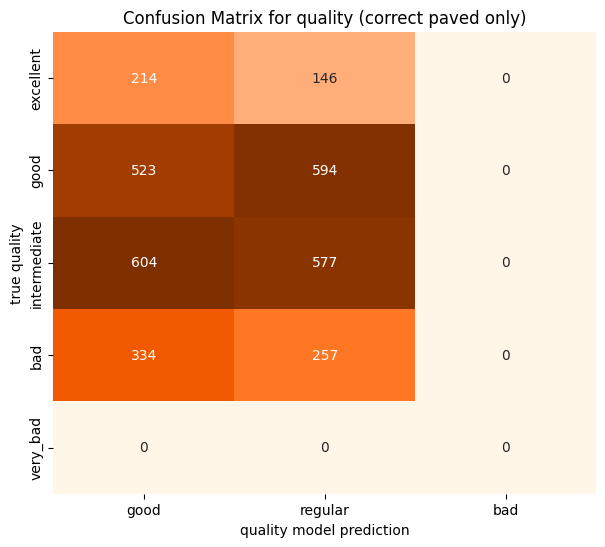

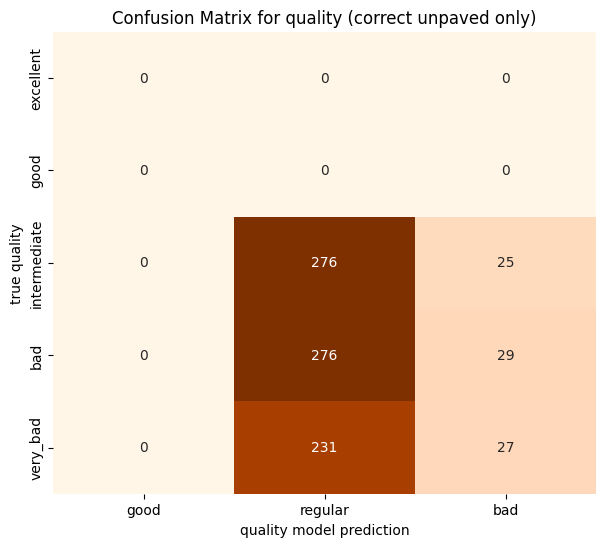

In [20]:
# confusion matrix for all model surface types
cmap = LinearSegmentedColormap.from_list("mycmap", ["#FFF6E8", "#FF5F00", "#7F3000"])

# labels_type_true = df.type_true.unique()
# labels_type_pred = df.type_pred.unique()
labels = ['excellent', 'good', 'intermediate', 'regular', 'bad', 'very_bad']

fig, axes = plt.subplots(1, 1, figsize=(7, 6))

cm = confusion_matrix(df[(df.type_true == 'asphalt-concrete')].quality_true, df[(df.type_true == 'asphalt-concrete')].quality_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df = cm_df.loc[['excellent', 'good', 'intermediate', 'bad', 'very_bad']]
cm_df = cm_df[['good', 'regular', 'bad']]
sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap, cbar=False,
            xticklabels=['good', 'regular', 'bad'],
            yticklabels=['excellent', 'good', 'intermediate', 'bad', 'very_bad'],
            ax=axes)
axes.set_title(f"Confusion Matrix for quality (correct asphalt only)")
axes.set_xlabel("quality model prediction")
axes.set_ylabel("true quality")

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(7, 6))

cm = confusion_matrix(df[(df.type_true == 'paving_stones-sett')].quality_true, df[(df.type_true == 'paving_stones-sett')].quality_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df = cm_df.loc[['excellent', 'good', 'intermediate', 'bad', 'very_bad']]
cm_df = cm_df[['good', 'regular', 'bad']]
sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap, cbar=False,
            xticklabels=['good', 'regular', 'bad'],
            yticklabels=['excellent', 'good', 'intermediate', 'bad', 'very_bad'],
            ax=axes)
axes.set_title(f"Confusion Matrix for quality (correct paved only)")
axes.set_xlabel("quality model prediction")
axes.set_ylabel("true quality")

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(7, 6))

# TODO
cm = confusion_matrix(df[(df.type_true == 'unpaved')].quality_true, df[(df.type_true == 'unpaved')].quality_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df = cm_df.loc[['excellent', 'good', 'intermediate', 'bad', 'very_bad']]
cm_df = cm_df[['good', 'regular', 'bad']]
sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap, cbar=False,
            xticklabels=['good', 'regular', 'bad'],
            yticklabels=['excellent', 'good', 'intermediate', 'bad', 'very_bad'],
            ax=axes)
axes.set_title(f"Confusion Matrix for quality (correct unpaved only)")
axes.set_xlabel("quality model prediction")
axes.set_ylabel("true quality")

plt.show()

## Measures for quality by surface type

In [21]:
def compute_measures_cat(true, pred):
    return{
        "accuracy": sum(true == pred) / len(true)
    }

def compute_measures_float(true_float, pred_float):
    m = {
    "accuracy": sum(true_float.round() == pred_float.round()) / len(true_float),
    "correlation": np.corrcoef(true_float, pred_float)[0, 1],
    "r_square": r2_score(true_float, pred_float),
    "mse": mean_squared_error(true_float, pred_float),
    "mae": mean_absolute_error(true_float, pred_float)
    }
    m["rmse"] = np.sqrt(m["mse"])
    return m

In [22]:
gm_surface = pd.DataFrame()
for surface in df.type_true.unique():
    df_ = df[df.type_true == surface]
    gm = compute_measures_float(df_.quality_float_true, df_.quality_float_pred)
    gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)

gm_surface.round(2)

,asphalt-concrete,paving_stones-sett,unpaved
accuracy,0.35,0.34,0.33
correlation,0.34,0.04,-0.15
r_square,-0.19,-707.16,-1.64
mse,0.93,583.03,1.68
mae,0.81,1.37,1.04
rmse,0.96,24.15,1.29


## compare float values

In [83]:
df_wo_outliers = df[(df["quality_float_pred"] >= 0) & (df["quality_float_pred"] <= 6)]

In [84]:
df_wo_outliers.shape

(776, 9)

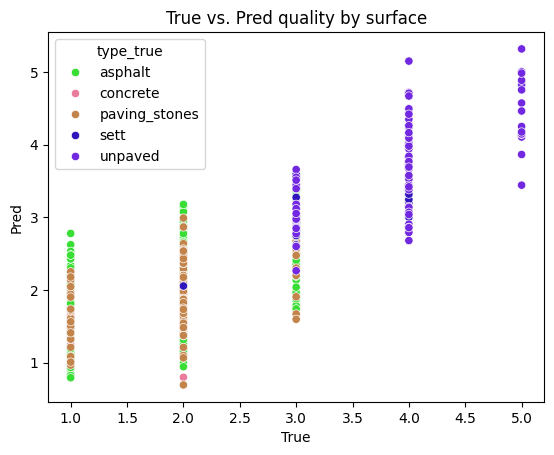

In [85]:
# Plot
np.random.seed(5)
colors = {surface_type: np.random.rand(3,) for surface_type in df.type_true.unique()}

sns.scatterplot(data=df_wo_outliers, x="quality_float_true", y="quality_float_pred", hue="type_true", palette=colors, legend="full", )
plt.xlabel('True')
plt.ylabel('Pred')
plt.title('True vs. Pred quality by surface')
plt.show()


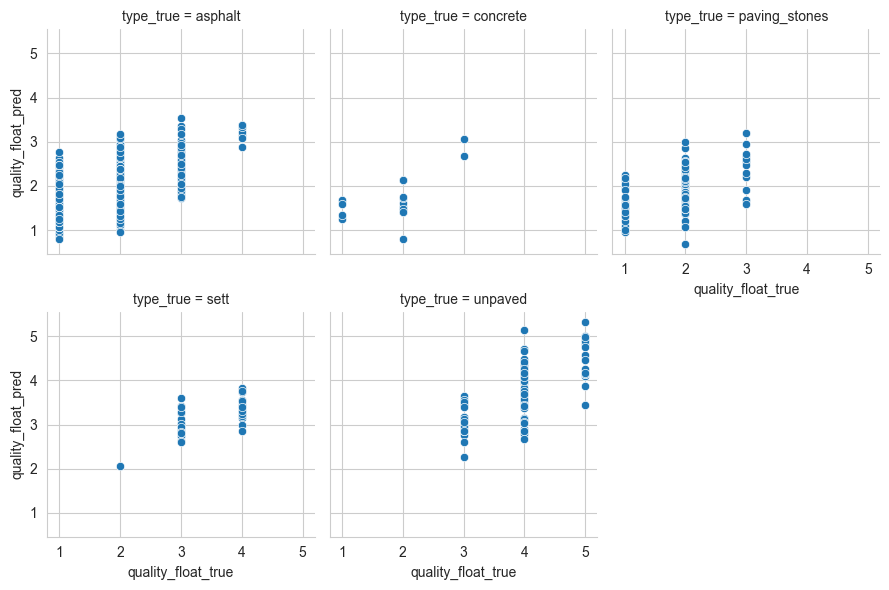

In [86]:
sns.set_style("whitegrid")

# Create a FacetGrid
g = sns.FacetGrid(df_wo_outliers, col="type_true", col_wrap=3)

# Map scatter plot for each surface type
g.map(sns.scatterplot, "quality_float_true", "quality_float_pred")

plt.show()

#### Hom much do the deviate?

In [ ]:
df_valid_quality.loc[:,"deviation"] = df_valid_quality.quality_float_true - df_valid_quality.quality_float_pred

**Overall**

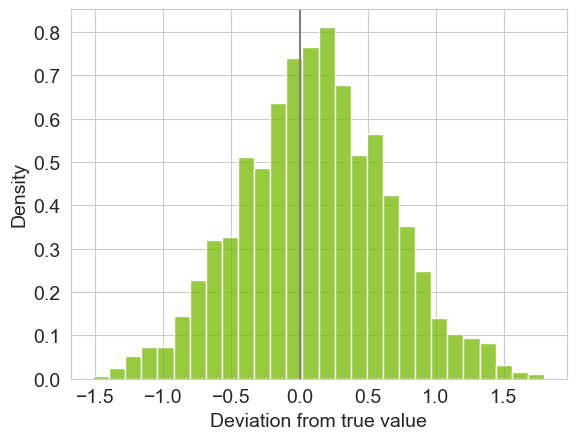

In [ ]:
sns.histplot(df_valid_quality, color='#76B900', stat="density", x="deviation")
plt.xlabel("Deviation from true value")
plt.axvline(x=0, color="grey")
plt.savefig("deviation_hist_quality_V1_0.png", transparent=True)
plt.show()


In [ ]:
np.mean(df_valid_quality.deviation)

0.1149677615464645

In [ ]:
np.std(df_valid_quality.deviation)


0.5403729757753959

In [ ]:
(abs(df_valid_quality.deviation) >= 1).value_counts()

deviation
False    1515
True      120
Name: count, dtype: int64

In [ ]:
120/len(df_valid_quality)

0.07339449541284404

**by surface**

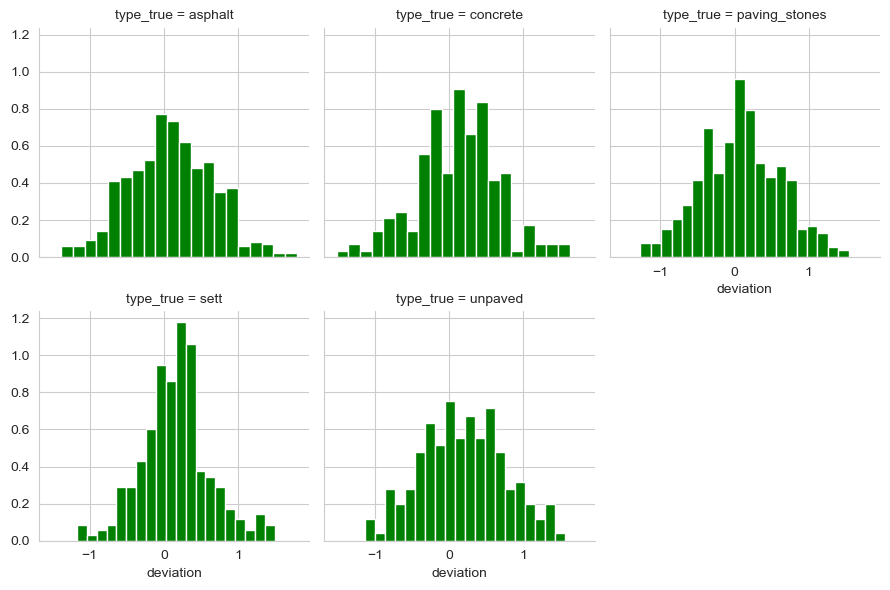

In [ ]:
# Create a FacetGrid for histograms
g_hist = sns.FacetGrid(df_valid_quality, col="type_true", col_wrap=3)

# Map histogram for deviation for each surface type
g_hist.map(plt.hist, "deviation", color='green', density=True, bins=20)

plt.show()

## compare classes

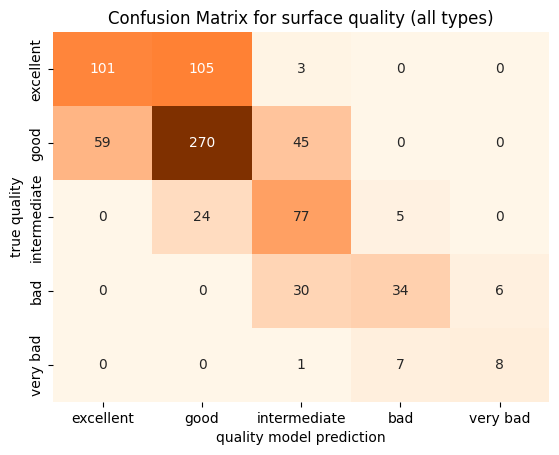

In [23]:
# only validation
# Plotting the confusion matrix using seaborn heatmap
cmap = LinearSegmentedColormap.from_list("mycmap", ["#FFF6E8", "#FF5F00", "#7F3000"])

cm = confusion_matrix(df.quality_true, df.quality_pred, labels=["excellent", "good", "intermediate", "bad", "very_bad"])
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
            xticklabels=["excellent", "good", "intermediate", "bad", "very bad"],
            yticklabels=["excellent", "good", "intermediate", "bad", "very bad"])
plt.title(f"Confusion Matrix for surface quality (all types)")
plt.xlabel("quality model prediction")
plt.ylabel("true quality")
plt.savefig("confusion_matrix_quality_v1_0.png", transparent=True, bbox_inches='tight')
plt.show()

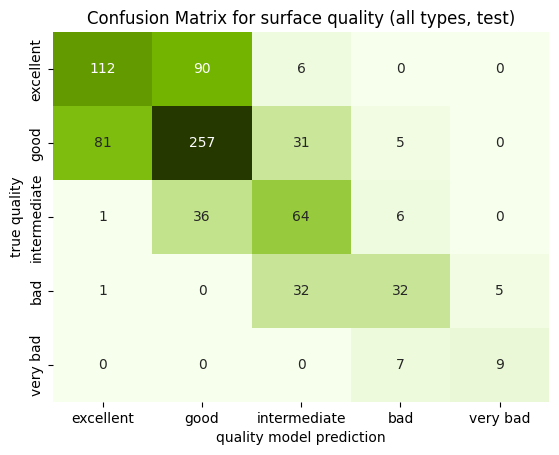

In [ ]:
# only validation
# Plotting the confusion matrix using seaborn heatmap
cmap = LinearSegmentedColormap.from_list("mycmap", ["#F7FFED", "#76B900", "#355300", "#243800"])

cm = confusion_matrix(df_test.quality_true, df_test.quality_pred, labels=["excellent", "good", "intermediate", "bad", "very_bad"])
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
            xticklabels=["excellent", "good", "intermediate", "bad", "very bad"],
            yticklabels=["excellent", "good", "intermediate", "bad", "very bad"])
plt.title(f"Confusion Matrix for surface quality (all types, test)")
plt.xlabel("quality model prediction")
plt.ylabel("true quality")
plt.savefig("confusion_matrix_quality_v1_0_test.png", transparent=True, bbox_inches='tight')
plt.show()

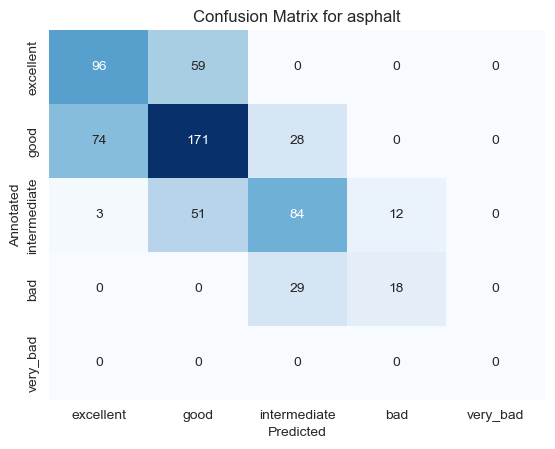

<Figure size 640x480 with 0 Axes>

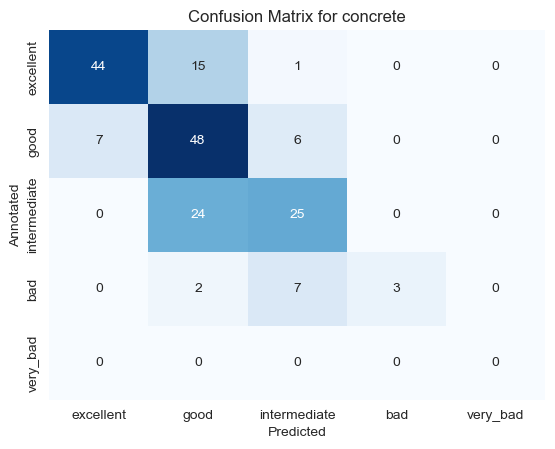

<Figure size 640x480 with 0 Axes>

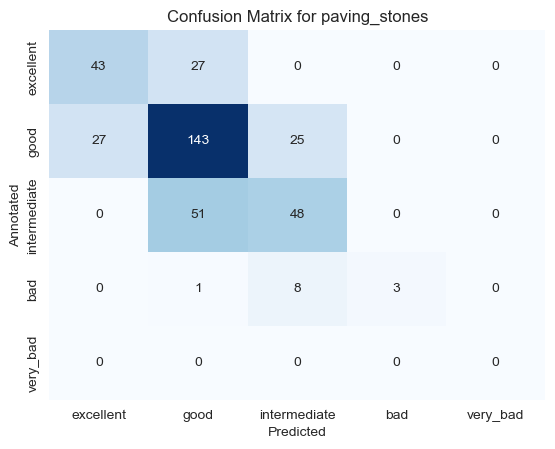

<Figure size 640x480 with 0 Axes>

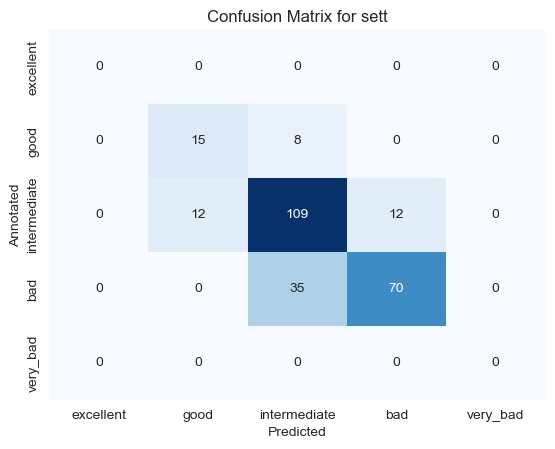

<Figure size 640x480 with 0 Axes>

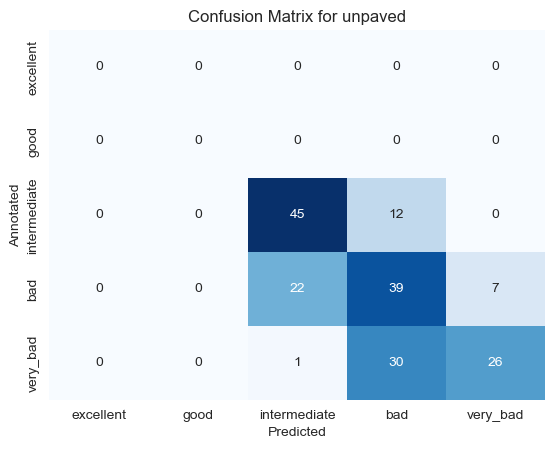

<Figure size 640x480 with 0 Axes>

In [ ]:
# only validation
# Plotting the confusion matrix using seaborn heatmap
for surface in df_valid_quality.type_true.unique():
    _df = df_valid_quality[(df_valid_quality.type_true == surface)]
    cm = confusion_matrix(_df.quality_true, _df.quality_pred, labels=["excellent", "good", "intermediate", "bad", "very_bad"])
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["excellent", "good", "intermediate", "bad", "very_bad"],
                yticklabels=["excellent", "good", "intermediate", "bad", "very_bad"])
    plt.title(f"Confusion Matrix for {surface}")
    plt.xlabel("Predicted")
    plt.ylabel("Annotated")
    plt.show()



In [ ]:
# Extract predicted and ground truth values
precisions = []
recalls = []
f1scores = []
for class_name in df_valid_type['type_true'].unique():
    _df1 = df_valid_type[df_valid_type['type_pred'] == class_name]
    _df2 = df_valid_type[df_valid_type['type_true'] == class_name]
    class_precision = sum(_df1.type_true == class_name) / len(_df1)
    class_recall = sum(_df2.type_pred == class_name) / len(_df2)
    f1score = 2 * (class_precision * class_recall) / (class_precision + class_recall)
    precisions.append(class_precision)
    recalls.append(class_recall)
    f1scores.append(f1score)

    print(f"Class: {class_name}")t
    print(f"Count (pred): {len(_df1)}")
    print(f"Count (true): {len(_df2)}")
    print(f"Precision: {round(class_precision, 2)}")
    print(f"Recall: {round(class_recall, 2)}")
    print("------------------------")

print("------------------------")
print("------------------------")

print(f"Average precision: {round(np.mean(precisions), 2)}")
print(f"Average recall: {round(np.mean(recalls), 2)}")
print(f"Average F1-Score: {round(np.mean(f1scores), 2)}")
print(f"Accuracy: {round(sum(df_valid_type.type_true == df_valid_type.type_pred) / len(df_valid_type), 2)}")

Class: asphalt
Count (pred): 631
Count (true): 641
Precision: 0.95
Recall: 0.93
------------------------
Class: concrete
Count (pred): 205
Count (true): 191
Precision: 0.8
Recall: 0.85
------------------------
Class: sett
Count (pred): 267
Count (true): 267
Precision: 0.96
Recall: 0.96
------------------------
Class: paving_stones
Count (pred): 375
Count (true): 385
Precision: 0.98
Recall: 0.95
------------------------
Class: unpaved
Count (pred): 192
Count (true): 186
Precision: 0.94
Recall: 0.97
------------------------
------------------------
------------------------
Average precision: 0.92
Average recall: 0.93
Average F1-Score: 0.93
Accuracy: 0.94
